<h1><center>Lab 1 - Introduction</center></h1>

- What is a Jupyter Notebook?
 - Notebooks are interactive coding environments which were created for coding in Julia, R, and Python.
- What do you need to install?
 - Notebooks can be used either on online platforms such as Google Colab and Kaggle or locally by installing various libraries and extensions.
 - Tutorial for local Jupyter environment: [link](https://jupyter.org/install)
 - Tutorial for VSCode environment: [link](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)
 - Tutorial for PyCharm environment: [link](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html)
- What will we explore at the lab?
 - We will only implement algorithms that rely on and help explain metaheuristics. This will including local searching algorithms, evolutionary algorithms and swarm algorithms.
- How will labs work?
 - Every lab will have two parts:
   - The work during the lab.
   - The work for the next lab.
 - Everything should be implemented in Jupyter Notebook
 - A well written notebook can be considered documentation and a separate file won't be needed


## Examples for how notebooks can be used

Notebooks contain two types of cells:
- text cells that can also contain markdown
 - they can be edited whenever you want
- code cells that can con contain shell/python code
 - if the last executed line is in Python and it returns a value, the value will be shown as the result of the shell

In [1]:
# normal code
print("Hello World!")

Hello World!


In [2]:
# if the last line is a function call (that has a return) or a variable, the value will be shown upon execution
# __repr__ will be used for showing the result of the shell
a = 10
a

10

In [6]:
def f_exemplu():
  """Return Hellow World"""
  return "Hello World!"
f_exemplu # this will show the documentation for the function

<function __main__.f_exemplu()>

In [7]:
# this will show the value returned by the function
# we can use functions defined in other cells, as long as the cells have been executed
f_exemplu()

'Hello World!'

In [8]:
# the same applies for imports
import math
import matplotlib.pyplot as plt
import numpy as np

In [9]:
math.sqrt() # this is an error message

TypeError: math.sqrt() takes exactly one argument (0 given)

In [10]:
# using ! at the start of a line you can use various shell commands
# this includes pip
!echo "new"

"new"


## Exemple - Random Search

- This algorithm is based on the idea of generating k random solution and returning the best one based on a fitness function
- We will apply the random search algorithm for the following problem:
 - Given a set of objects represented as a list of numbers, get the subset of those numbers that form the maximum sum without sorting the list. A solution for the problem is considered valid only if the sum of the numbers is greater or equal to a given minimum value.
- Below you will find code for creating a solution using binary encoding, a fitness function, the structure for the random search algorithm
- The code below will also contain information useful for documenting your results.

In [ ]:
# maximum sum given a list of numbers

def generate_solution(n: int):
    """
        Generate solution of length n using binary encoding
        Input:
          n: int
        Output:
          sol: list
              - binary encoding solution
    """
    return list(np.random.randint(2, size=n))

def fitness(objects: list, sol: list):
    """
        Fitness function
        Input:
          objects: list
          sol: list
              - binary encoding solution
        Output:
          s: int
    """
    s = 0
    for i in range(len(objects)):
      s += objects[i] * sol[i]
    return s

def is_valid(objects: list, sol: list, min_value: int):
    """
     A solution is valid if its sum is greater or equal than min_value
     Input:
       objects: list
       sol: list
           - binary encoding solution
       min_value: int
     Output:
        bool
    """
    s = fitness(objects, sol)
    return s >= min_value

def generate_valid_solution(n: int, objects: list, min_value: int):
    """
     A solution is valid if its sum is greater than min_value
     Input:
       n: int
       objects: list
       min_value: int
     Output:
        sol: list
    """
    stop = False
    sol = []
    while not stop:
        sol = generate_solution(n)
        stop = is_valid(objects, sol, min_value)
    return sol

def generate_k_solutions(n: int, k: int, objects: list, min_value: int):
    """
      Generate k valid solutions
      Input:
        n: int
        k: int
        objects: list
        min_value: int
      Output:
        solution_list: list
            - list of valid solutions
    """
    solution_list = []
    while k > 0:
        sol = generate_valid_solution(n, objects, min_value)
        solution_list.append(sol)
        k -= 1
    return solution_list

def random_search(k: int, objects: list, min_value: int):
    """
      A random search algorithm
      Input:
        k: int
        objects: list
        min_value: int
      Output:
        best: list
            - best solution
        best_fitness: int
            - fitness of the best solution
        solution_list: list
            - list of all solutions generated
    """
    solution_list = generate_k_solutions(len(objects), k, objects, min_value)
    best = max(solution_list, key=lambda x: fitness(objects, x))
    return best, fitness(objects, best), solution_list

In [ ]:
def random_search_n_times(n: int, k: int, objects: list, min_value: int):
    """
    Runs the random search algorithm n times and returns a list of the best solutions found.
    Input:
        n: int
            - number of times to run the algorithm
        k: int
            - number of solutions to generate in each run
        objects: list
        min_value: int
    Output:
        best_solutions: list
    """
    best_solutions = []
    for _ in range(n):
        best_solution, best_fitness, _ = random_search(k, objects, min_value)
        best_solutions.append((best_solution, best_fitness))
    return best_solutions


def plot_solutions(objects: list, solution_list: "list[list]"):
    """
    Plots the fitness values of the solutions in solution_list.
    Input:
        objects: list
        solution_list: list
            - list of solutions
    Output:
        None
    """
    fitness_values = [fitness(objects, sol) for sol in solution_list]
    plt.plot(fitness_values)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness Value")
    plt.title("Random Search Results")
    plt.show()

In [ ]:
# problem instance given by objects and min_value
objects = [-1, 0, -2, 0, 3, 5, 1, -100, 20, -10, 10]
min_value = -10
# evaluation algorithm params are n and k in this case
# k no. iterations
# n no. runs
n = 10
k = 15
best_results = random_search_n_times(n, k, objects, min_value)
best = max(best_results, key=lambda x: x[1])
average = sum([x[1] for x in best_results]) / len(best_results)
print(f"Best solution {best[1]} represented by {best[0]}\n\
      Average is {average}")

Best solution 39 represented by [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]
      Average is 34.2


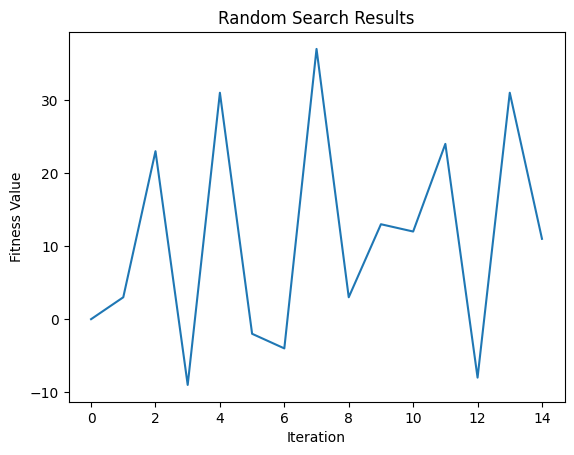

In [ ]:
# we can showcase the evolution of a solution using a plot
_, _, solution_list = random_search(k, objects, min_value)
plot_solutions(objects, solution_list)

In [ ]:
# we can also run the algorithm for multiple sets of params
# and save the results in a markdown table
values_for_n = [10]
values_for_k = [5, 10, 20, 50, 100, 150]


markdown_table = "| n | k | Best Solution | Average Solution |\n"
markdown_table += "|---|---|---|---| \n"

# This can be extracted into its own function
for n in values_for_n:
    for k in values_for_k:
        best_results = random_search_n_times(n, k, objects, min_value)
        best = max(best_results, key=lambda x: x[1])
        average = sum([x[1] for x in best_results]) / len(best_results)
        markdown_table += f"| {n} | {k} | {best[1]} | {average} |\n"

markdown_table # copy paste the results in a text cell

'| n | k | Best Solution | Average Solution |\n|---|---|---|---| \n| 10 | 5 | 38 | 30.8 |\n| 10 | 10 | 39 | 31.8 |\n| 10 | 20 | 38 | 34.7 |\n| 10 | 50 | 39 | 36.9 |\n| 10 | 100 | 39 | 37.3 |\n| 10 | 150 | 39 | 38.5 |\n'

| n | k | Best Solution | Average Solution |
|---|---|---|---|
| 10 | 5 | 38 | 30.8 |
| 10 | 10 | 39 | 31.8 |
| 10 | 20 | 38 | 34.7 |
| 10 | 50 | 39 | 36.9 |
| 10 | 100 | 39 | 37.3 |
| 10 | 150 | 39 | 38.5 |
